# **Many-to-One LSTM for Sentiment Analysis and Text Generation**

## **Project Overview**

This project is to explore the fascinating world of sentiment analysis and text generation using many-to-one Long Short-Term Memory (LSTM) neural networks.

**Sentiment Detection:**
Here we dive into sentiment analysis by training an LSTM model to analyze airline sentiments. The dataset consists of sentiment labels (0 or 1; 0 represent negative review, 1 represent positive review) and corresponding text reviews. We preprocess the data, converting it into a numerical representation using the bag-of-words technique. Through the many-to-one LSTM architecture, we predict sentiment labels based on the textual input.

**Text Generation:**
We venture into the realm of text generation. Using the beloved classic "Alice's Adventures in Wonderland" as our training text, we will prepare and structure the data to facilitate the training of many-to-one LSTMs. These LSTMs learn the patterns and sequences in the text, enabling us to generate new text based on a given prompt. We focus specifically on next-word prediction, allowing us to generate coherent and contextually relevant sentences.

During this exploration, we address the challenges of text generation, including the dynamic nature of language and the presence of multiple words with similar meanings. To overcome these challenges, we utilize techniques such as entropy scaling and softmax temperature. By adjusting the temperature parameter, we can control the randomness and diversity of the generated text.


## **Learning Outcomes**

* Gain insights into sentiment analysis and its importance in analyzing sentiments from textual data.
* Learn essential preprocessing techniques for cleaning and preparing textual data for sentiment analysis.
* Understand how to convert text into a numerical representation using the bag-of-words technique.
* Implement LSTM architecture for the sentiment detection task.
* Train and evaluate LSTM models using labeled sentiment data.
* Explore text generation using many-to-one LSTMs with "Alice's Adventures in Wonderland" as training text.
* Understand the challenges of text generation, including language variability and context dependence.
* Discover entropy scaling for controlled randomness and diversity in text generation.
* Learn about softmax temperature as a hyperparameter to control prediction randomness.
* Develop skills in next-word prediction and generating coherent and contextually relevant sentences.
* Use this project as a foundation for further exploration in sentiment analysis, text generation, and deep learning with LSTMs.


## **Approach**

* Sentiment Analysis:

    * Dataset:
        * Obtain the airline sentiment dataset consisting of sentiment labels (0 or 1) and corresponding text reviews.

    * Preprocessing:
        * Perform data preprocessing tasks, including text cleaning, tokenization, and removing stop words.
        * Convert the text reviews into a bag-of-words representation.

    * Many-to-One LSTM:
        * Utilize many-to-one LSTM architecture to train the sentiment detection model.
        * Feed the bag-of-words representation of the text reviews as input to the LSTM.

    * Training:
        * Split the dataset into training and testing sets.
        * Train the LSTM model using the training set.
        * Evaluate the model's performance on the testing set.

* Text Generation:

    * Dataset:
        * Obtain the "Alice's Adventures in Wonderland" text dataset.

    * Preparing and Structuring:
        * Preprocess the text data by cleaning, tokenizing, and structuring the sentences and phrases.
        * Create sequences

    * Many-to-One LSTM:
        * Implement many-to-one LSTM architecture for text generation.
        * Train the LSTM model using the prepared dataset.

    * The Problem with Text Generation:
        * Understand the challenges associated with text generation, such as the variability of language and the dependence on context, style, and word choice.
        * Recognize that natural language utilizes a wide variety of words, which may have similar meanings and require careful consideration during generation.

    * Randomness through Entropy Scaling:
        * Explore the concept of entropy scaling to introduce controlled randomness into text generation.

    * Softmax Temperature:
        * Introduce the concept of softmax temperature, a hyperparameter used to control the randomness of predictions in LSTMs and neural networks.
        * Predicting using the Temperature


## **Install Packages**


In [ ]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# !pip install tensorflow
# !pip install numpy
# !pip install pandas
# !pip install nltk

### **Import Libraries**

In [ ]:
# import relevant packages
import os
from collections import Counter

import tensorflow as tf
from keras.layers import Dense, Activation
from keras.layers import SimpleRNN, LSTM, GRU
from keras.models import Sequential
from keras.utils import to_categorical, pad_sequences
from keras.layers import Embedding

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np
import nltk
import re

from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords

In [ ]:
pd.set_option('display.max_colwidth', None)
tf.keras.backend.set_image_data_format("channels_last")
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## **Refresher: Neural Networks**

### **Neural Network Architecture**

Neural networks, also known as artificial neural networks or simply neural nets, are computational models inspired by the structure and functionality of the human brain. They are widely used in machine learning and deep learning for solving complex problems across various domains.

#### **Basic Structure**

A neural network consists of interconnected layers of artificial neurons, also known as nodes or units. The layers are organized into an input layer, one or more hidden layers, and an output layer. The input layer receives the input data, the hidden layers process the information, and the output layer produces the final predictions or outputs.

#### **Neurons and Connections**

Each neuron in a neural network performs a computation on its inputs and produces an output. The neurons in one layer are connected to the neurons in the subsequent layer through weighted connections. These weights determine the strength of the connections and are adjusted during the training process to optimize the network's performance.


#### **Mathematics of a Basic Neural Network**

A basic neural network consists of multiple layers of neurons connected by weighted connections. Let's consider a neural network with one input layer, one hidden layer, and one output layer.

#### **Notation**:

- Input layer: $X = [x_1, x_2, ..., x_n]$, where $x_i$ represents the $i$-th input feature.
- Hidden layer: $H = [h_1, h_2, ..., h_m]$, where $h_i$ represents the $i$-th neuron in the hidden layer.
- Output layer: $Y = [y_1, y_2, ..., y_k]$, where $y_i$ represents the $i$-th output neuron.

#### **Forward Propagation**:

The weighted sum of inputs for a neuron in the hidden layer is calculated as:

$$z_j = \sum_{i=1}^{n} w_{ji}^{(1)} x_i + b_j^{(1)}$$

where $w_{ji}^{(1)}$ represents the weight connecting the $i$-th input to the $j$-th neuron in the hidden layer, and $b_j^{(1)}$ is the bias term for the $j$-th neuron.

The output of each neuron in the hidden layer is obtained by applying an activation function $\sigma$:

$$h_j = \sigma(z_j)$$

Similarly, the weighted sum of inputs for a neuron in the output layer is calculated as:

$$z_k = \sum_{j=1}^{m} w_{kj}^{(2)} h_j + b_k^{(2)}$$

where $w_{kj}^{(2)}$ represents the weight connecting the $j$-th neuron in the hidden layer to the $k$-th neuron in the output layer, and $b_k^{(2)}$ is the bias term for the $k$-th neuron.

The output of each neuron in the output layer is obtained by applying an activation function $\sigma$:

$$y_k = \sigma(z_k)$$

#### **Activation Functions:**

Activation functions are a vital component of neural networks. They introduce non-linearity and enable the neural network to learn complex relationships in the data. Here are a few reasons why activation functions are necessary:

1. **Non-Linearity**: Without activation functions, the neural network would only be able to approximate linear functions, limiting its learning capacity. Activation functions allow the network to model non-linear relationships between inputs and outputs.

2. **Normalization**: Activation functions can normalize the output of a neuron, ensuring that the values fall within a desired range. This can help in stabilizing the learning process and improving the convergence of the network.

3. **Differentiability**: Activation functions are differentiable, which is essential for training neural networks using gradient-based optimization algorithms like backpropagation. The gradients of the activation functions help in updating the weights and biases during the training process.



Common activation functions used in neural networks include the sigmoid function, tanh (hyperbolic tangent) function, and Rectified Linear Unit (ReLU) function.

By applying activation functions after the weighted sum of inputs, neural networks can model complex relationships and make non-linear predictions, enabling them to solve a wide range of problems.


#### **Feedforward Propagation**

In feedforward propagation, the information flows through the network in the forward direction, starting from the input layer and passing through the hidden layers until it reaches the output layer. Each neuron receives inputs from the previous layer, computes its weighted sum, applies the activation function, and passes the output to the next layer.

#### **Backpropagation**

Backpropagation is an algorithm used to train neural networks by adjusting the weights based on the calculated gradients of the loss function with respect to the weights. It involves computing the error between the predicted outputs and the actual targets and propagating this error backward through the network to update the weights.

#### **Loss Functions**

Loss functions quantify the difference between the predicted outputs of the neural network and the actual targets. Common loss functions include mean squared error (MSE) for regression tasks and cross-entropy for classification tasks. The choice of the loss function depends on the nature of the problem being solved.

#### **Optimization Algorithms**

Optimization algorithms, such as stochastic gradient descent (SGD) and its variants (e.g., Adam, RMSprop), are used to minimize the loss function and update the weights of the neural network during training. These algorithms adjust the weights iteratively based on the gradients computed through backpropagation.

#### **Hidden Layers and Network Depth**

The hidden layers in a neural network perform the computations necessary for feature extraction and representation learning. The number of hidden layers and the number of neurons in each layer, referred to as the network's depth, are hyperparameters that can be adjusted based on the complexity of the problem and the available computational resources.

#### **Deep Neural Networks**

Deep neural networks refer to neural networks with multiple hidden layers. Deep learning has gained significant attention due to the ability of deep neural networks to learn hierarchical representations and solve complex problems in areas such as computer vision, natural language processing, and speech recognition.

Neural network architecture plays a crucial role in the performance and capabilities of the model. Choosing the right architecture, including the number of layers, the number of neurons, and the activation functions, is essential for achieving optimal results in various machine learning and deep learning tasks.


### **Neural Network Prediction for Regression and Classification**

Neural networks are versatile models that can be used for both regression and classification tasks. The prediction process differs slightly depending on the type of problem being addressed.

#### **Regression Prediction**

In regression tasks, the goal is to predict a continuous numerical value as the output. Here's how neural networks make predictions for regression:

1. **Feedforward Propagation**: The input data is passed through the neural network in the forward direction. Each neuron in the network receives inputs from the previous layer, computes the weighted sum of inputs, applies an activation function, and passes the output to the next layer. This process continues until the output layer is reached.

2. **Output Layer**: In regression, the output layer typically consists of a single neuron that produces a continuous numerical value. The activation function used in the output layer depends on the specific requirements of the problem. For example, a ReLU function is commonly used for regression tasks.

3. **Final Prediction**: The output value of the neural network's output neuron represents the predicted value for the regression task. It can be interpreted as the model's estimation or approximation of the target value based on the given input.

#### **Classification Prediction**

In classification tasks, the goal is to assign input data to specific categories or classes. Neural networks can perform multi-class or binary classification. Here's how neural networks make predictions for classification:

1. **Feedforward Propagation**: Similar to regression, the input data is propagated through the network in the forward direction. Each neuron computes the weighted sum of inputs, applies an activation function, and passes the output to the next layer.

2. **Output Layer**: In classification, the output layer depends on the number of classes in the problem. For binary classification, the output layer typically consists of a single neuron using a sigmoid activation function, which produces a value between 0 and 1 representing the probability of belonging to the positive class. For multi-class classification, the output layer may consist of multiple neurons using softmax activation, where each neuron represents the probability of belonging to a specific class.

3. **Final Prediction**: In binary classification, the predicted class can be determined based on a threshold value (e.g., 0.5). If the output probability is above the threshold, the sample is classified as the positive class; otherwise, it is classified as the negative class. In multi-class classification, the class with the highest predicted probability is assigned as the predicted class.

Neural networks learn the mapping between the input data and the desired output through the training process, where the weights and biases are adjusted to minimize the error between the predicted output and the actual target values. Once trained, the neural network can be used to make predictions on new, unseen data.

Understanding how neural networks make predictions in regression and classification tasks is crucial for interpreting the model's outputs and evaluating its performance.


### **Recurrent Neural Networks**

RNN were created because there were a few issues in the feed-forward neural network:

Cannot handle sequential data
Considers only the current input
Cannot memorize previous inputs
The solution to these issues is the RNN. An RNN can handle sequential data, accepting the current input data, and previously received inputs. RNNs can memorize previous inputs due to their internal memory.

RNN works on the principle of saving the output of a particular layer and feeding this back to the input in order to predict the output of the layer.

Below is how you can convert a Feed-Forward Neural Network into a Recurrent Neural Network

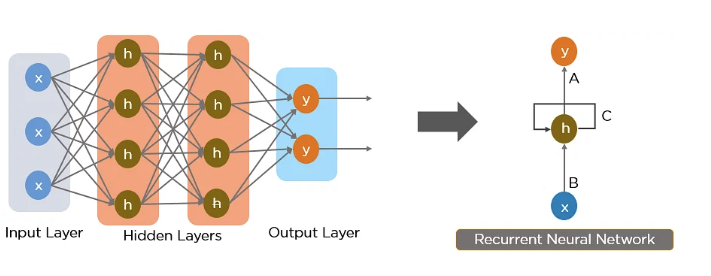

The nodes in different layers of the neural network are compressed to form a single layer of recurrent neural networks. A, B, and C are the parameters of the network.

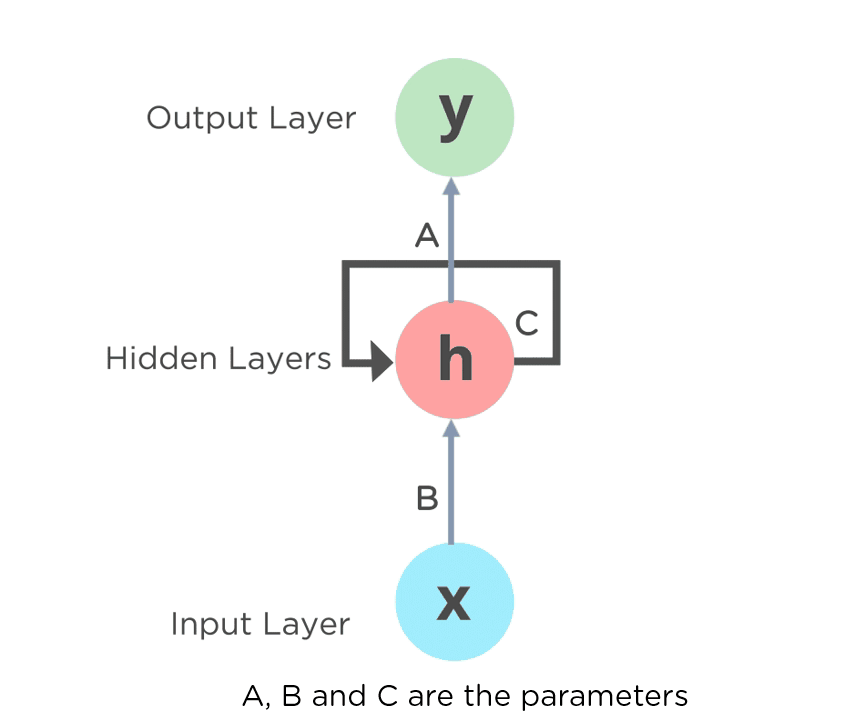

The four commonly used types of Recurrent Neural Networks are:

**One-to-One**: The simplest type of RNN is One-to-One, which allows a single input and a single output. It has fixed input and output sizes and acts as a traditional neural network. The One-to-One application can be found in Image Classification.

**One-to-Many**: One-to-Many is a type of RNN that gives multiple outputs when given a single input. It takes a fixed input size and gives a sequence of data outputs. Its applications can be found in Music Generation and Image Captioning.

**Many-to-One**: Many-to-One is used when a single output is required from multiple input units or a sequence of them. It takes a sequence of inputs to display a fixed output. Sentiment Analysis is a common example of this type of Recurrent Neural Network.

**Many-to-Many**: Many-to-Many is used to generate a sequence of output data from a sequence of input units.

This type of RNN is further divided into ﻿the following two subcategories:

    1. Equal Unit Size: In this case, the number of both the input and output units is the same. A common application can be found in Name-Entity Recognition.
    2. Unequal Unit Size: In this case, inputs and outputs have different numbers of units. Its application can be found in Machine Translation.

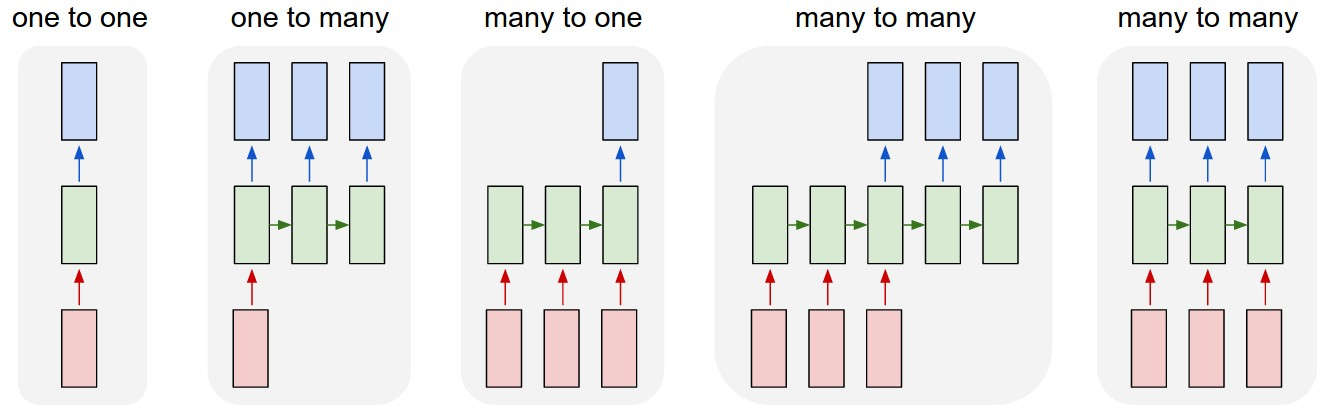

### **LSTM**

Now, even though RNNs are quite powerful, they suffer from Vanishing gradient problem which hinders them from using long term information, like they are good for storing memory 3-4 instances of past iterations but larger number of instances don't provide good results so we don't just use regular RNNs. Instead, we use a better variation of RNNs: Long Short Term Networks(LSTM).

**What is Vanishing Gradient problem?**

Vanishing gradient problem is a difficulty found in training artificial neural networks with gradient-based learning methods and backpropagation. In such methods, each of the neural network's weights receives an update proportional to the partial derivative of the error function with respect to the current weight in each iteration of training. The problem is that in some cases, the gradient will be vanishingly small, effectively preventing the weight from changing its value. In the worst case, this may completely stop the neural network from further training. As one example of the problem cause, traditional activation functions such as the hyperbolic tangent function have gradients in the range (0, 1), and backpropagation computes gradients by the chain rule. This has the effect of multiplying n of these small numbers to compute gradients of the "front" layers in an n-layer network, meaning that the gradient (error signal) decreases exponentially with n while the front layers train very slowly.

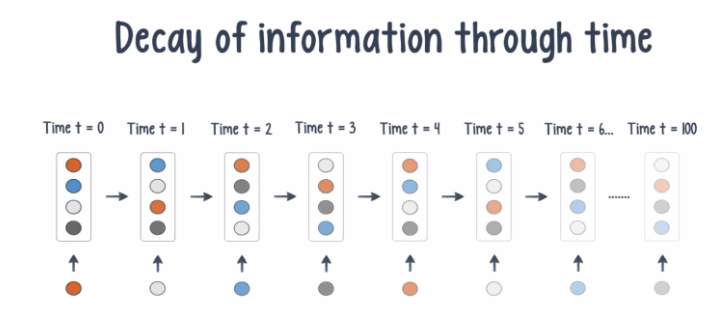
    

**Fixing the Vanishing/Exploding Gradient with LSTMs**

Long short-term memory (LSTM) units (or blocks) are a building unit for layers of a recurrent neural network (RNN). A RNN composed of LSTM units is often called an LSTM network. A common LSTM unit is composed of a cell, an input gate, an output gate and a forget gate. The cell is responsible for "remembering" values over arbitrary time intervals; hence the word "memory" in LSTM. Each of the three gates can be thought of as a "conventional" artificial neuron, as in a multi-layer (or feedforward) neural network: that is, they compute an activation (using an activation function) of a weighted sum. Intuitively, they can be thought as regulators of the flow of values that goes through the connections of the LSTM; hence the denotation "gate". There are connections between these gates and the cell.

The expression long short-term refers to the fact that LSTM is a model for the short-term memory which can last for a long period of time. An LSTM is well-suited to classify, process and predict time series given time lags of unknown size and duration between important events. LSTMs were developed to deal with the exploding and vanishing gradient problem when training traditional RNNs.

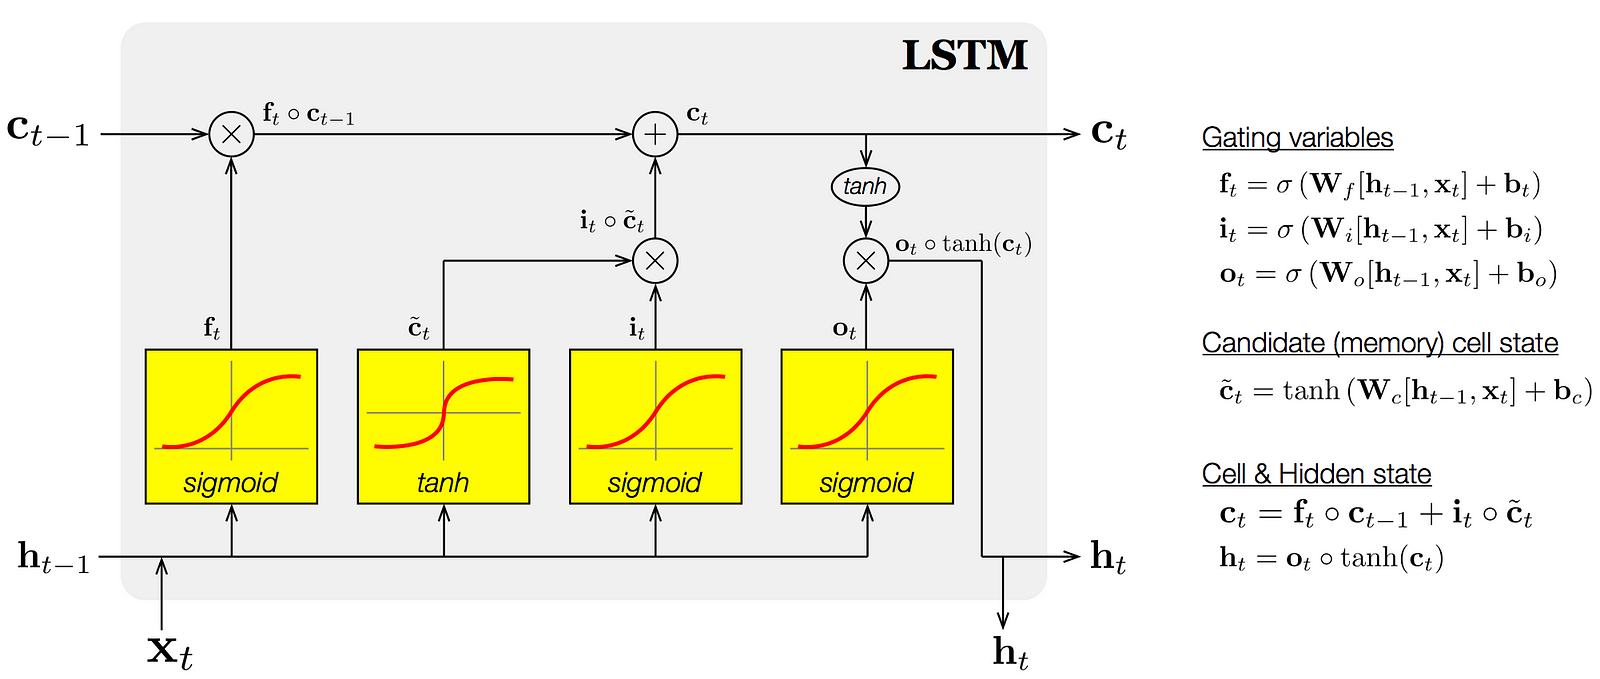

More on LSTMs: https://medium.com/deep-math-machine-learning-ai/chapter-10-1-deepnlp-lstm-long-short-term-memory-networks-with-math-21477f8e4235

## **Sentiment Detection with (Many to One) LSTM**

Previously we looked at one-to-one RNN type, which is the basic structure. And next one is one-to-many type. For example, if the model gets the fixed format like image as an input, it generates the sequence data. You can see the implementation on image caption application. Another type is many-to-many type. It gets sequence data as an inputs, and also generates the sequence data as an output. Common application of many-to-many type is machine translation.

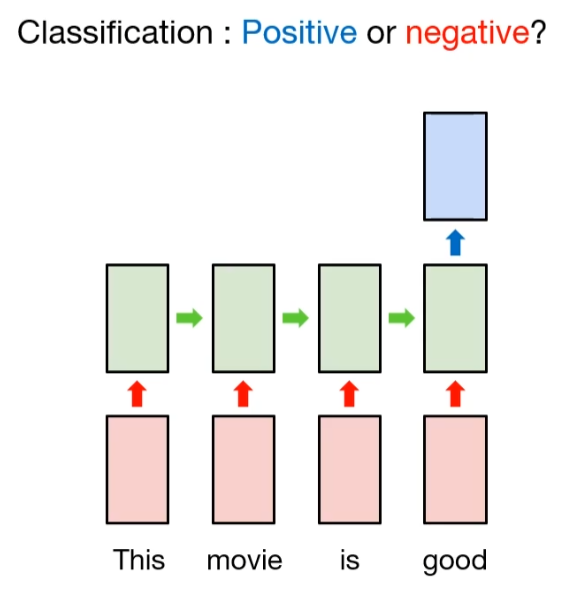

Many-to-one type, which is our topic in this post, gets an sequence data as an input and generates some informatic data like labels. So we can use it for classification. Suppose that someone defines the sentiment of each sentence, and train the model with many-to-one type. And when the model gets the unseen sentence, then it will predict the intention of sentence, good or bad.

Suppose we have a sentence, **"This movie is interesting"**. And we want to classify the sentiment of this sentence. In order to do this, we need to apply tokenization in word level. If this sentensce intends the good sentiment, then word token may contains good words, like "good". So we can classify this sentence to good sentiment.

So if we want to apply it in RNN model, we need to consider the sentence as a word sequence (many), then classify its label (one). That is process of many-to-one type model.

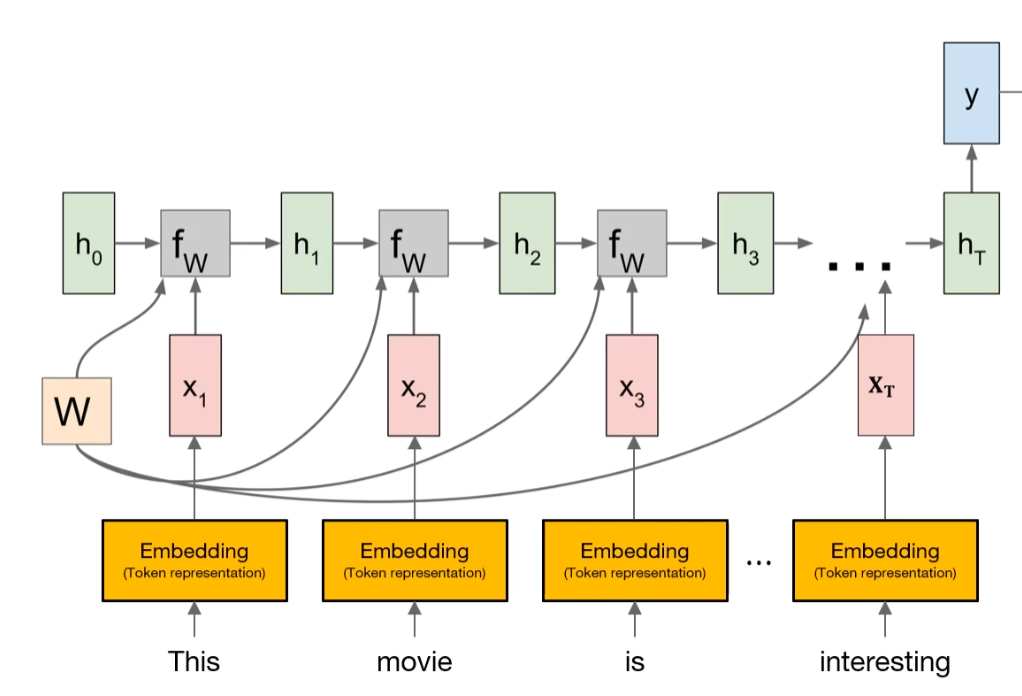

## **Reading the dataset**

In [ ]:
df = pd.read_csv('/content/airline_sentiment.csv')
df.head()

# column airline_sentiment 1 represent positive review, 0 represent negative review

,airline_sentiment,text
0,1,@VirginAmerica plus you've added commercials to the experience... tacky.
1,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
2,0,@VirginAmerica and it's a really big bad thing about it
3,0,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA
4,1,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)"


## **Pre Processing data for training**

- Normalise sentences: remove special characters, convert to lower case etc.
- Remove stop words to give more relevance to specific words

**Normalizing Sentences:**

Normalizing sentences is an important step in text preprocessing for sentiment analysis and text generation tasks. It involves applying various techniques to standardize the text data and make it more uniform. Here are some reasons why normalizing sentences is done:

    * Remove Special Characters: Special characters such as punctuation marks, symbols, or emojis do not contribute much to the sentiment or meaning of a sentence. By removing these special characters, we can focus on the essential words and improve the efficiency of the subsequent analysis steps.

    * Convert to Lower Case: Converting all text to lower case helps in reducing the dimensionality of the data. It ensures that the same words appearing in different cases (e.g., "good" and "Good") are treated as the same word during analysis. This step avoids duplication and helps in capturing the overall sentiment more accurately.

    * Uniformity and Consistency: Normalizing sentences ensures that the text data is consistent and follows a standard format. It helps in creating a uniform representation of words and phrases, allowing the subsequent models to learn patterns and relationships effectively.

**Removing Stop Words:**

Stop words are commonly occurring words in a language that do not carry much meaning or contribute significantly to the sentiment of a sentence. Examples of stop words include "a," "the," "and," "is," and so on. Here are the reasons why removing stop words is done:

    * Relevance to Specific Words: Stop words occur frequently in the text but often do not add much value to sentiment analysis or text generation. Removing stop words can help in focusing on the more meaningful and informative words, providing better context for sentiment analysis and generating more relevant and coherent text.

    * Noise Reduction: Stop words can introduce noise and unwanted variation in the text data. By eliminating them, we can reduce the noise level and improve the signal-to-noise ratio. This leads to better analysis results and more accurate predictions.

    * Reducing Dimensionality: Stop words are typically high-frequency words that appear in almost every sentence. By removing them, we can reduce the dimensionality of the data and improve computational efficiency during model training and inference.

In [ ]:
# Loading English stop words
stop = nltk.corpus.stopwords.words('english')

In [ ]:
def pre_process_text_data(text: str) -> str:
    # normalize and remove special characters
    text = text.lower()
    text = re.sub('[^0-9a-zA-Z]+',' ',text)
    # remove stop words
    words = text.split()
    words = [w for w in words if (w not in stop)]
    words = ' '.join(words)
    return words

In [ ]:
df['text'] = df['text'].apply(pre_process_text_data)
df.head()

,airline_sentiment,text
0,1,virginamerica plus added commercials experience tacky
1,0,virginamerica really aggressive blast obnoxious entertainment guests faces amp little recourse
2,0,virginamerica really big bad thing
3,0,virginamerica seriously would pay 30 flight seats playing really bad thing flying va
4,1,virginamerica yes nearly every time fly vx ear worm go away


## **Checking most used words**

In [ ]:
counts = Counter()
for i, review in enumerate(df['text']):
    counts.update(review.split())

In [ ]:
words = sorted(counts, key=counts.get, reverse=True)
words[0:10]

['united',
 'flight',
 'usairways',
 'americanair',
 'southwestair',
 'jetblue',
 'get',
 'cancelled',
 'thanks',
 'service']

## **Creating numeric representation of words (Bag of Words)**

The bag-of-words representation is a technique used to convert text data into a numerical representation that can be used for machine learning algorithms. It disregards the order and structure of words in a sentence and focuses solely on the frequency of occurrence of words. Here's an overview of the steps involved in creating a bag-of-words representation:

    * Tokenization: The text is split into individual words or tokens. Each token represents a unit of meaning, such as a word or a combination of words.

    * Vocabulary Creation: All unique tokens in the text data are collected to create a vocabulary or a dictionary. This vocabulary serves as the set of all possible features for the bag-of-words representation.

    * Frequency Count: For each document or sentence in the text data, the frequency of each token in the vocabulary is counted. This creates a numerical representation of the text data, where each entry represents the frequency of a specific token in a particular document.

    * Checking Sequence Length and Padding: In some cases, the length of different sentences or documents may vary. To handle this, the sequence length is checked, and padding is applied to ensure that all sequences have the same length.

The resulting bag-of-words representation is typically a matrix where each row represents a document or sentence, and each column corresponds to a specific token in the vocabulary. The values in the matrix represent the frequency or occurrence of each token in the corresponding document.

Example:

| Document  | Word1 | Word2 | Word3 | Word4 | Word5 |
|-----------|-------|-------|-------|-------|-------|
| Sentence1 | 2     | 1     | 0     | 1     | 0     |
| Sentence2 | 0     | 1     | 1     | 0     | 1     |
| Sentence3 | 1     | 0     | 0     | 1     | 1     |
| Sentence4 | 0     | 1     | 0     | 0     | 0     |

In this example, we have four sentences (Sentence1, Sentence2, Sentence3, and Sentence4) with five unique words (Word1, Word2, Word3, Word4, and Word5). The table represents the bag-of-words representation, where each entry indicates the frequency of the corresponding word in the respective sentence. For instance, in Sentence1, Word1 occurs twice, Word2 occurs once, and so on.


In [ ]:
# transform word to integer
word_to_int = {word: i for i, word in enumerate(words, start=1)}
# transform integer to word
int_to_word = {i: word for i, word in enumerate(words, start=1)}

In [ ]:
def text_to_int(text:str, word_to_int: dict):
    return [word_to_int[word] for word in review.split()]


def int_to_text(int_arr, int_to_word: dict):
    return ' '.join([int_to_word[index] for index in int_arr if index != 0])

In [ ]:
mapped_reviews = []
for review in df['text']:
    mapped_reviews.append(text_to_int(review, word_to_int))

In [ ]:
print(f'Original text: {df.loc[0]["text"]}')
print(f'Mapped text: {mapped_reviews[0]}')

Original text: virginamerica plus added commercials experience tacky
Mapped text: [44, 450, 1142, 2233, 100, 5429]


In [ ]:
# checking length of review
length_sent = []
for i in range(len(mapped_reviews)):
    length_sent.append(len(mapped_reviews[i]))


## **Checking sequence length and padding accordingly**

In [ ]:
sequence_length = max(length_sent)
X = pad_sequences(maxlen = sequence_length,
                  sequences = mapped_reviews,
                  padding = "post",
                  value = 0)

In [ ]:
X[0]

array([  44,  450, 1142, 2233,  100, 5429,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0], dtype=int32)

In [ ]:
y = df['airline_sentiment'].values

## **Creating LSTM Model**

In [ ]:
embedding_vecor_length = 32
max_review_length = 26

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=12533, output_dim=32, input_length = 26))
model.add(LSTM(40, return_sequences=True))
model.add(LSTM(40, return_sequences=False))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 26, 32)            401056    
                                                                 
 lstm_2 (LSTM)               (None, 26, 40)            11680     
                                                                 
 lstm_3 (LSTM)               (None, 40)                12960     
                                                                 
 dense_1 (Dense)             (None, 2)                 82        
                                                                 
Total params: 425778 (1.62 MB)
Trainable params: 425778 (1.62 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


## **Preparing data for training and validation**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

## **One-hot-encoding**

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## **Training**

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

Epoch 1/50
253/253 [==============================] - 17s 46ms/step - loss: 0.3479 - accuracy: 0.8611 - val_loss: 0.2247 - val_accuracy: 0.9093
Epoch 2/50
253/253 [==============================] - 9s 37ms/step - loss: 0.1417 - accuracy: 0.9491 - val_loss: 0.2146 - val_accuracy: 0.9168
Epoch 3/50
253/253 [==============================] - 9s 37ms/step - loss: 0.0768 - accuracy: 0.9744 - val_loss: 0.2949 - val_accuracy: 0.9134
Epoch 4/50
253/253 [==============================] - 11s 42ms/step - loss: 0.0503 - accuracy: 0.9838 - val_loss: 0.3157 - val_accuracy: 0.9113
Epoch 5/50
253/253 [==============================] - 11s 42ms/step - loss: 0.0294 - accuracy: 0.9903 - val_loss: 0.3733 - val_accuracy: 0.9082
Epoch 6/50
253/253 [==============================] - 10s 39ms/step - loss: 0.0227 - accuracy: 0.9927 - val_loss: 0.3983 - val_accuracy: 0.9108
Epoch 7/50
253/253 [==============================] - 9s 36ms/step - loss: 0.0222 - accuracy: 0.9938 - val_loss: 0.4282 - val_accuracy: 0.

In [ ]:
%matplotlib inline
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_loss_values) + 1)

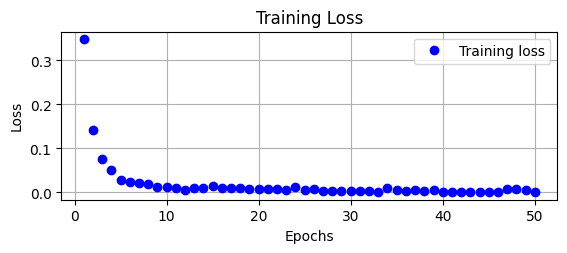

In [ ]:
plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()

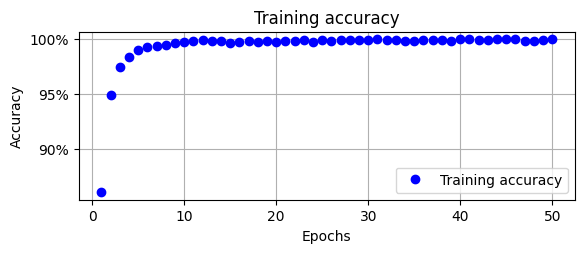

In [ ]:
plt.subplot(212)
plt.plot(epochs, history.history['accuracy'], 'bo', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x * 100) for x in plt.gca().get_yticks()])
plt.legend()
plt.grid('off')
plt.show()

## **Anecdotes**

In [ ]:
def get_sentiment(model, text) -> str:
    text_int_embedding = text_to_int(text, word_to_int)
    text_int_embedding = pad_sequences(maxlen = sequence_length,
                                       sequences = [text_int_embedding],
                                       padding = "post", value = 0)
    sentiment_index = np.argmax(model.predict(text_int_embedding))
    return sentiment_index

In [ ]:
result = np.argmax(model.predict(X_test), axis=1)

109/109 [==============================] - 2s 8ms/step


In [ ]:
positive_sentences = [int_to_text(embedding, int_to_word) for i, embedding in enumerate(X_test) if result[i] == 1]

In [ ]:
negative_sentences = [int_to_text(embedding, int_to_word) for i, embedding in enumerate(X_test) if result[i] == 0]

In [ ]:
positive_sentences[:5]

['jetblue flight flight booking problems experience pretty great',
 'southwestair leeannhealey yeah sale fares got places fly oh damn right live swa fly',
 'jetblue news gate options',
 'jetblue utah think thanks',
 'americanair let extraordinary week make year remember goingforgreat 2015 thanks much american airlines']

In [ ]:
negative_sentences[:5]

['usairways glad airline going swallowed american american always picks phone solves problems',
 'southwestair disconnected call 2 5 hours without even speaking octaviannightmare',
 'americanair well done taken fun air travel phlairport',
 'usairways told coded upgrade clearly purchased seat miles refuse downgrade ripoff',
 'rt virginamerica met match got status another airline upgrade restr http co rhkamx9vf5 http co pyalebgkjt']

## **Generating Text**

The strategy that we'll adopt to generate text is as follows:

1. Import project Gutenberg's Alice's Adventures in Wonderland dataset, which can be downloaded from https://www.gutenberg.org/files/11/11-0.txt.
2. Preprocess the text data so that we bring every word to the same case, and remove punctuation.
3. Assign an ID to each unique word and then convert the dataset into a sequence of word IDs.
4. Loop through the total dataset, 10 words at a time. Consider the 10 words as input and the subsequent 11th word as output.
5. Build and train a model, by performing embedding on top of the input word IDs and then connecting the embeddings to an LSTM, which is connected to the output layer through a hidden layer. The value in the output layer is the one-hot-encoded version of the output.
6. Make a prediction for the subsequent word by taking a random location of word and consider the historical words prior to the location of the random word chosen.
7. Move the window of the input words by one from the seed word's location that we chose earlier and the tenth time step word shall be the word that we predicted in the previous step

**Overview**

Input Preparation:

    The input text is preprocessed by converting it to lowercase and removing any non-alphanumeric characters.
    The text is then split into individual words and stored in a list.

Vocabulary Building:

    The vocabulary is constructed by counting the occurrences of each unique word in the text.
    Words are sorted based on their frequency, with more frequent words having higher priority.
    Each word is assigned a unique index, creating a mapping between words and their respective indices.

Sequence Generation:

    To train the model, we need input-output pairs in the form of sequences.
    A sliding window approach is employed, where a fixed-length sequence of words (input sequence) is paired with the subsequent word (output word).
    By sliding the window over the text with a specified step size, multiple input-output pairs are generated.

Encoding the Data:

    To feed the data into the LSTM model, we need to encode the input and output sequences into a suitable format.
    One-hot encoding is applied to represent each word as a binary vector, indicating whether or not a specific word is present in the sequence.
    The input data is converted into a 3D array, where each element represents the presence or absence of a word at a specific position in the sequence.
    The output data is converted into a 2D array, where each row corresponds to the one-hot encoded representation of the output word.

Model Architecture:

    The LSTM model is constructed with a many-to-one architecture.
    The input layer receives the encoded input sequences.
    The LSTM layer processes the input sequences, capturing the temporal dependencies and learning the patterns in the data.
    The LSTM layer outputs a fixed-size representation (hidden state) of the input sequence.
    The hidden state is passed through a dense (fully connected) layer with a softmax activation function.
    The softmax layer generates a probability distribution over the vocabulary, indicating the likelihood of each word being the next word in the sequence.

Training the Model:

    The model is trained using the input-output pairs generated from the text data.
    During training, the model learns to minimize the difference between the predicted output and the actual output (one-hot encoded representation of the next word).
    The model's parameters are updated iteratively using an optimizer (in this case, Adam) and a loss function (categorical cross-entropy).

Generating Text:

    To generate text, we provide a seed sequence as input to the trained model.
    The model predicts the next word in the sequence based on the input.
    The predicted word is appended to the input sequence, and the process is repeated to generate subsequent words.
    By iteratively predicting the next word, we can generate text that follows the patterns and style learned during training.

In [ ]:
# reading data
def load_data(filename: str = 'alice.txt'):
    with open(filename, encoding='utf-8-sig') as fin:
        lines = []
        for line in fin:
            line = line.strip().lower()
            if (len(line) == 0):
                continue
            lines.append(line)
        fin.close()
        text = " ".join(lines)
    return text

In [ ]:
text = load_data()

In [ ]:
# print part of chapter from the book
text[3001:3500]

'moment to think about stopping herself before she found herself falling down a very deep well. either the well was very deep, or she fell very slowly, for she had plenty of time as she went down to look about her and to wonder what was going to happen next. first, she tried to look down and make out what she was coming to, but it was too dark to see anything; then she looked at the sides of the well, and noticed that they were filled with cupboards and book-shelves; here and there she saw maps '

Normalize the text to remove punctuations and convert it to lowercase



In [ ]:
def pre_process(text: str) -> str:
    text = text.lower()
    text = re.sub('[^0-9a-zA-Z]+', ' ', text)
    return text

Assign the unique words to an index so that they can be referenced when constructing the training and test datasets

In [ ]:
counts = Counter()
counts.update(text.split())

words = sorted(counts, key=counts.get, reverse=True)
nb_words = len(text.split())

word2index = {word: i for i, word in enumerate(words)}
index2word = {i: word for i, word in enumerate(words)}

### Preparing the Data

In [ ]:
SEQLEN = 10
STEP = 1

Construct the input set of words that leads to an output word. Note that we are considering a sequence of 10 words and trying to predict the 11th word


In [ ]:
def get_input_and_labels(text: str,
                         seq_length: int = SEQLEN,
                         step: int = STEP):

    input_words = []
    label_words = []

    text_arr = text.split()

    for i in range(0, nb_words-seq_length, step):
        x = text_arr[i:(i+seq_length)]
        y = text_arr[i+seq_length]
        input_words.append(x)
        label_words.append(y)

    return input_words, label_words

In [ ]:
input_words, label_words = get_input_and_labels(text)

In [ ]:
print(f'Input: {" ".join(input_words[0])}\nOutput: {label_words[0]}')

Input: the project gutenberg ebook of alice’s adventures in wonderland, by
Output: lewis


Construct the vectors of the input and the output datasets:

In [ ]:
total_words = len(set(words))

X = np.zeros((len(input_words), SEQLEN, total_words), dtype= bool)
y = np.zeros((len(input_words), total_words), dtype=bool)

We are creating empty arrays in the preceding step, which will be populated in the following code:

In [ ]:
# Create encoded vectors for the input and output values
for i, input_word in enumerate(input_words):
    for j, word in enumerate(input_word):
        X[i, j, word2index[word]] = 1
        y[i, word2index[label_words[i]]] = 1


In the preceding code, the first for loop is used to loop through all the words in the input sequence of words (10 words in input), and the second for loop is used to loop through an individual word in the chosen sequence of input words. Additionally, given that the output is a list, we do not need to update it using the second for loop (as there is no sequence of IDs)

In [ ]:
print(f'Input of X: {X.shape}\nInput of y: {y.shape}')

Input of X: (29584, 10, 5649)
Input of y: (29584, 5649)


### Defining the Model

In [ ]:
HIDDEN_SIZE = 128
BATCH_SIZE = 32
NUM_ITERATIONS = 100
NUM_EPOCHS_PER_ITERATION = 1
NUM_PREDS_PER_EPOCH = 100

In [ ]:
model = Sequential()

model.add(LSTM(HIDDEN_SIZE, return_sequences=False, input_shape=(SEQLEN, total_words)))
model.add(Dense(total_words, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               2958336   
                                                                 
 dense (Dense)               (None, 5649)              728721    
                                                                 
Total params: 3687057 (14.07 MB)
Trainable params: 3687057 (14.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Fit the model**.
- Look at how the output varies over an increasing number of epochs.
- Generate a random set of sequences of 10 words and try to predict the next possible word.
- We are in a position to observe how our predictions are getting better over an increasing number of epochs

In [ ]:
def check_model_output(model, preds: int, input_words, seq_length, total_words):
    test_idx = np.random.randint(int(len(input_words)*0.1)) * (-1)
    test_words = input_words[test_idx]

    for curr_pred in range(preds):
        curr_embedding = np.zeros((1, seq_length, total_words))

        for i, ch in enumerate(test_words):
            curr_embedding[0, i, word2index[ch]] = 1

        pred = model.predict(curr_embedding, verbose=0)[0]
        word_pred = index2word[np.argmax(pred)]

        print("=" * 50)
        print(f"Prediction {curr_pred + 1} of {preds}")
        print(f'Generating from seed: {" ".join(test_words)}\nNext Word: {word_pred}')
        print("=" * 50)

        test_words = test_words[1:] + [word_pred]

In [ ]:
for iteration in range(50):
    model.fit(X, y, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS_PER_ITERATION, validation_split = 0.1)
    if iteration % 10 == 0:
        check_model_output(model, 5, input_words, SEQLEN, total_words)


833/833 [==============================] - 163s 192ms/step - loss: 7.0331 - val_loss: 8.2519
Prediction 1 of 5
Generating from seed: printed editions, all of which are confirmed as not protected
Next Word: the
Prediction 2 of 5
Generating from seed: editions, all of which are confirmed as not protected the
Next Word: the
Prediction 3 of 5
Generating from seed: all of which are confirmed as not protected the the
Next Word: the
Prediction 4 of 5
Generating from seed: of which are confirmed as not protected the the the
Next Word: the
Prediction 5 of 5
Generating from seed: which are confirmed as not protected the the the the
Next Word: the
833/833 [==============================] - 151s 181ms/step - loss: 5.2550 - val_loss: 9.4088


In [ ]:
def predict_next_word(model, input_text: str, seq_length, total_words, temperature = None):
    curr_embedding = np.zeros((1, seq_length, total_words))

    for i, ch in enumerate(input_text):
        curr_embedding[0, i, word2index[ch]] = 1

    pred = model.predict(curr_embedding, verbose=0)[0]

    if temperature == None:
        word_pred = index2word[np.argmax(pred)]
    else:
        next_word_token = tf.random.categorical(tf.expand_dims(pred / temperature, 0), num_samples=1)[-1, 0].numpy()
        word_pred = index2word[next_word_token]

    return pred, word_pred

## **The Problem with Text Generation**

Language is not always the same and/or stationary, the next word to predict depends on the context, style and etc. Therefore, natural language, uses a wide variety of words, sometimes, with same meaning

The model is bias on the text that used for training

Lets have a look:

In [ ]:
test_words = input_words[-28701]
print(' '.join(test_words))

In [ ]:
logits, word_pred = predict_next_word(model, test_words, SEQLEN, total_words)

In [ ]:
print(f'Predicted word: {word_pred}')

Predicted word: time


In [ ]:
def generate_paragraph(model, seed, words: int, temperature: int):
    full_text = seed.copy()
    for _ in range(words):
        logits, word_pred = predict_next_word(model, seed, SEQLEN, total_words, temperature=temperature)
        seed = (seed + [word_pred])[-10:]
        full_text = full_text + [word_pred]
    return full_text

In [ ]:
for _ in range(5):
    print(' '.join(generate_paragraph(model, test_words, 12, None)))

## **Randomness through Entropy Scaling**

### What is Entropy in Machine Learning?

In Machine Learning, entropy is a measure of the level of disorder or uncertainty in a given dataset or system. It is a metric that quantifies the amount of information in a dataset, and it is commonly used to evaluate the quality of a model and its ability to make accurate predictions. Entropy is based on the concept of probability and is calculated using the formula -sum(p*log2(p)), where p is the probability of each possible outcome. In decision trees, entropy is used to determine the best split at each node and improve the overall accuracy of the model.

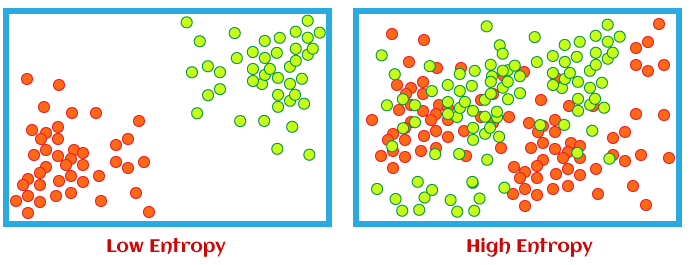

We can understand the term entropy with any simple example: flipping a coin. When we flip a coin, then there can be two outcomes. However, it is difficult to conclude what would be the exact outcome while flipping a coin because there is no direct relation between flipping a coin and its outcomes. There is a 50% probability of both outcomes; then, in such scenarios, entropy would be high. This is the essence of entropy in machine learning.

In [ ]:
sorted(logits, reverse=True)[:5]

[0.06757716, 0.0514937, 0.02583243, 0.023227636, 0.014906152]

## Softmax Temperature

Temperature is a hyperparameter of LSTMs (and neural networks generally) used to control the randomness of predictions by scaling the logits before applying softmax. Temperature scaling has been widely used to improve performance for NLP tasks that utilize the Softmax decision layer

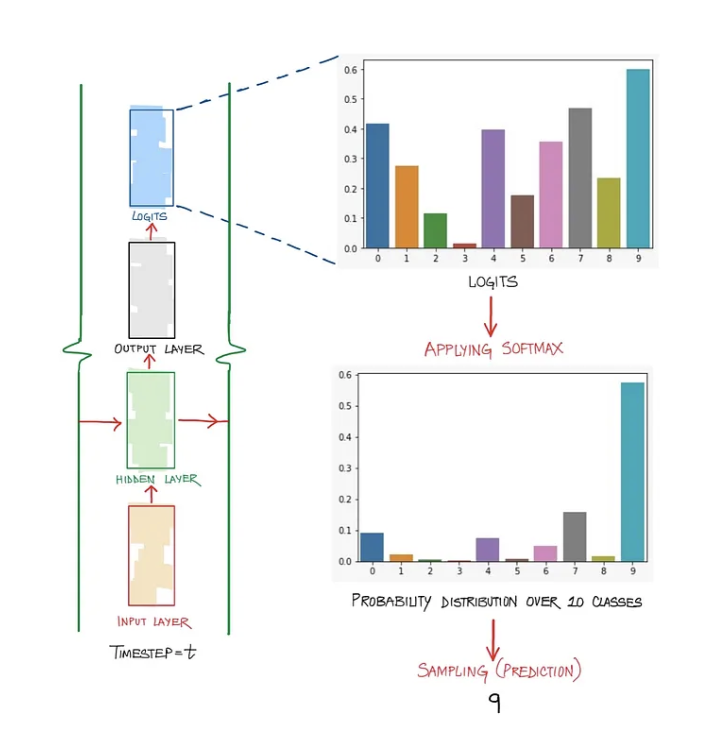

The generated sequence will have a predictable and generic structure. And the reason is less entropy or randomness in the softmax distribution, in the sense that the likelihood of a particular word (corresponding to index 9 in the above example) getting chosen is way higher than the other words. A sequence being predictable is not problematic as long as the aim is to get realistic sequences. But if the goal is to generate a novel text or an image which has never been seen before, randomness is the holy grail.

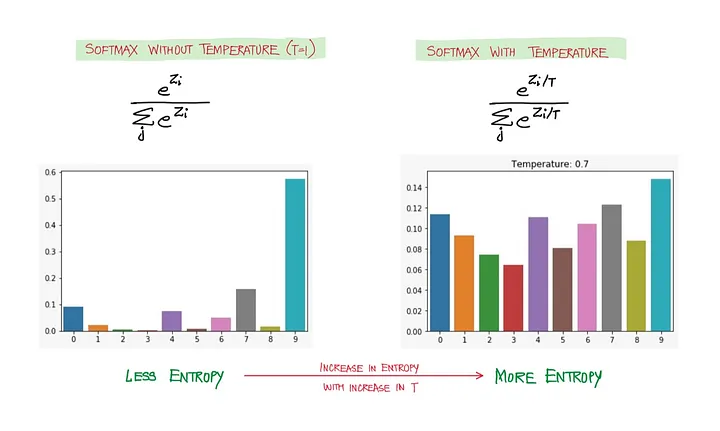

The distribution above approaches uniform distribution giving each word an equal probability of getting sampled out, thereby rendering a more creative look to the generated sequence. Too much creativity isn’t good either. In the extreme case, the generated text might not make sense at all. Hence, like all other hyperparameters, this needs to be tuned as well.

## Predicting using the Temperature

In [ ]:
for _ in range(5):
    print(' '.join(generate_paragraph(model, test_words, 12, 10)))

among the people that walk with their heads downward! the alone court,” to.” pop sits bursting particularly “just conversation. pie—” fairly,” pressing
among the people that walk with their heads downward! the i. stole gloves, talk. non-profit trumpet rabbit! pink cartwheels, saucepan ran, forepaws
among the people that walk with their heads downward! the hearts, them—“i professor yet invited,” states, room ridiculous (or takes “at hopeful
among the people that walk with their heads downward! the pool complying reaching tittered he’ll guard bowed baby; nibbling flat chimneys then—i
among the people that walk with their heads downward! the off. broken. by: hearts, doth slates, timidly life! offended!” _proves_ porpoise.” mallets


## **Conclusion**

In this project, we embarked on an exciting journey into sentiment analysis and text generation using many-to-one LSTMs. We began by diving into sentiment detection, training an LSTM model to analyze airline sentiments based on text reviews. Through data preprocessing, bag-of-words representation, and the many-to-one LSTM architecture, we successfully predicted sentiment labels with high accuracy.

Moving on to text generation, we leveraged the iconic literary work "Alice's Adventures in Wonderland" to train many-to-one LSTMs to generate contextually relevant text. We tackled the challenges of text generation, including language variability and word choice, and employed techniques such as entropy scaling and softmax temperature to control randomness and enhance the diversity of the generated text.

Throughout the project, we explored various concepts and techniques, from preprocessing textual data to training and evaluating LSTM models. We gained insights into sentiment analysis, understanding the significance of analyzing sentiments in textual data. Additionally, we delved into the intricacies of text generation, honing our skills in next-word prediction and generating coherent sentences.
